In [ ]:
# IMPORT REQUIRED LIBRARIES

import numpy as np                    # For numerical operations
import pandas as pd                   # For data manipulation
import matplotlib.pyplot as plt       # For plotting
import seaborn as sns                 # For statistical visualizations

import warnings
warnings.filterwarnings("ignore")     # Ignore warnings for clean output



In [ ]:
# Reading CSV file using pandas
df = pd.read_table("/content/cars.csv",sep=",")
# Display dataset
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


SPLIT INTO FEATURES AND TARGET

In [ ]:
# Selecting all columns except last as features
features =df.iloc[:,:-1] #EXCLUSIVE ONE COLUMN USING SICING

In [ ]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27


In [ ]:
# Selecting last column as target variable
Target = df.iloc[:,-1] #FETCHING SINGLE COLUMN USING SLICING

In [ ]:
Target

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
200,16845
201,19045
202,21485
203,22470


HANDLE MISSING VALUES

In [ ]:
# In dataset, missing values are represented by '?'
# Replace '?' with NumPy NaN so that sklearn can process it
features['normalized-losses'].replace("?",np.nan,inplace=True)
features['horsepower'].replace("?",np.nan,inplace=True)

In [ ]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27


APPLY SIMPLEIMPUTER
* SimpleImputer replaces missing values using a defined strategy
* Strategy = "mean" → replaces NaN with column mean

In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values = np.nan,strategy = "mean")

In [ ]:
# Fit and transform only the columns with missing values
features[["normalized-losses","horsepower"]]=si.fit_transform(features[["normalized-losses","horsepower"]])

In [ ]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27


#**outliers**


OUTLIER DETECTION USING BOXPLOT

<Axes: ylabel='price'>

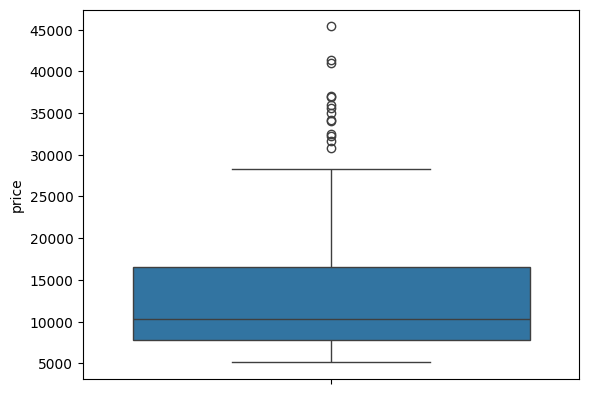

In [ ]:
# Boxplots help visualize outliers in numerical data
sns.boxplot(data=features,y=Target)

In [ ]:
# Statistical summary of target variable
Target.describe()

,price
count,205.000000
mean,13227.478049
std,7902.651615
min,5118.000000
25%,7788.000000
50%,10345.000000
75%,16500.000000
max,45400.000000


OUTLIER ANALYSIS BY CATEGORY

<Axes: xlabel='price', ylabel='make'>

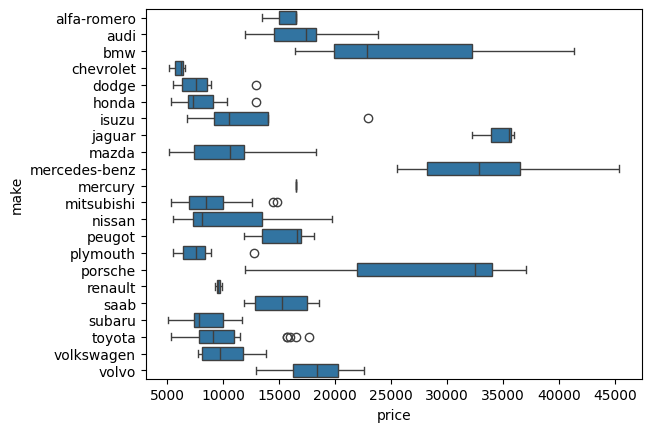

In [ ]:
# Visualizing price distribution for each car make
sns.boxplot(data=features,x=Target,y="make")

Removing unrealistic high-price entries per brand

In [ ]:
features[(features.make=="dodge")&(Target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [ ]:
features.drop(29,axis=0,inplace=True)

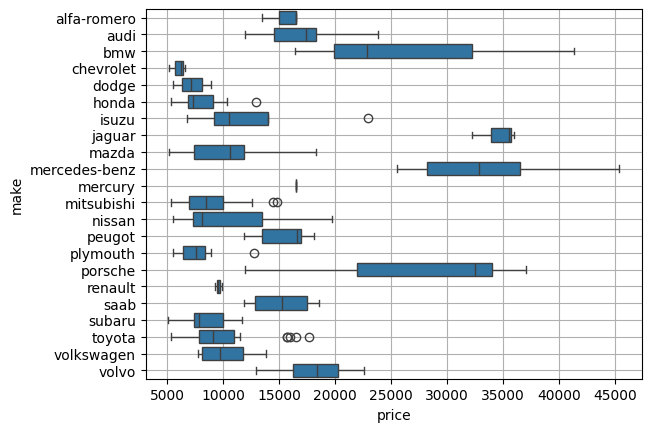

In [ ]:
sns.boxplot(data=features,x=Target,y="make")
plt.grid(True)

In [ ]:
features[(features.make=="honda")&(Target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
40,0,85.0,honda,gas,sedan,fwd,front,62.5,54.1,ohc,110,86.0,27,33
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28
42,1,107.0,honda,gas,sedan,fwd,front,66.0,51.0,ohc,110,100.0,25,31


In [ ]:
features.drop([40,41,42],axis=0,inplace=True)

In [ ]:
features[(features.make=="mitsubishi")&(Target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24


In [ ]:
features.drop([82,83,84],axis=0,inplace=True)

In [ ]:
features[(features.make=="plymouth")&(Target>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24


In [ ]:
features.drop(124,axis=0,inplace=True)

In [ ]:
features[(features.make=="toyota")&(Target>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24


In [ ]:
features.drop([172,178,179,180,181],axis=0,inplace=True)

In [ ]:
features[(features.make=="isuzu")&(Target>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43


In [ ]:
features.drop(45,axis=0,inplace=True)

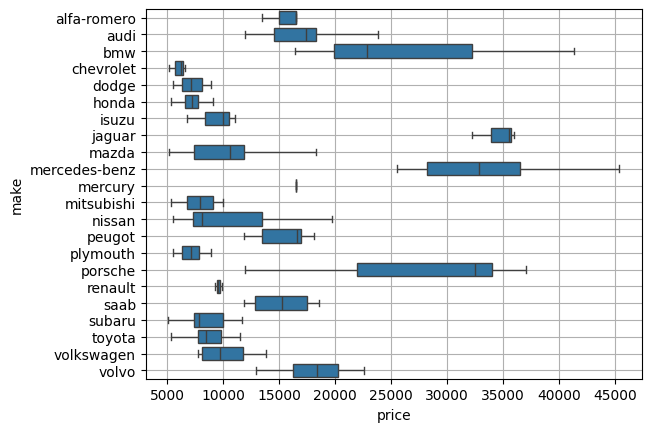

In [ ]:
#BOXPLOT AFTER OUTLIER REMOVAL
sns.boxplot(data=features,x=Target,y="make")
plt.grid(True)